#Import Libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset Description

In [111]:
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/Mall_Customers.csv', delimiter=',')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [112]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [113]:
df.shape

(200, 5)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


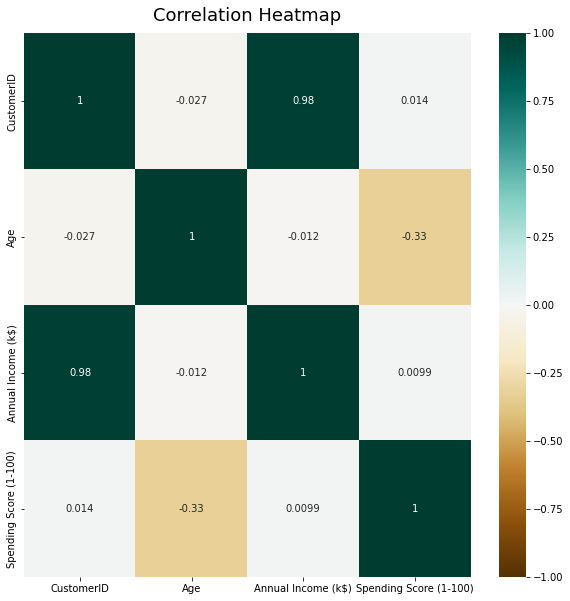

In [115]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

#Preprocessing

In [116]:
df_new = df.drop('CustomerID', axis = 1)
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [117]:
#One Hot Encode
data = pd.get_dummies(df_new, columns=['Gender'], drop_first=True)
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


#Check missing value

In [118]:
data.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Male               0
dtype: int64

In [119]:
#Duplicate Check
data.duplicated().sum()

0

#Distribution data visualization

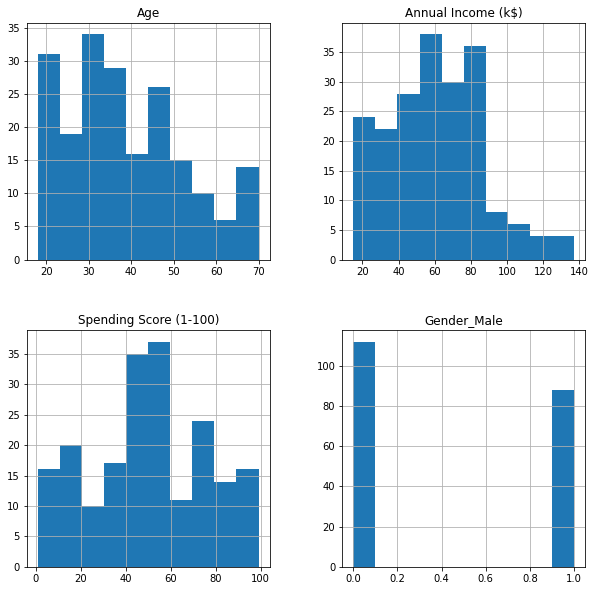

In [120]:
data.hist(figsize=(10,10))
plt.show()

#Scaling

In [121]:
from sklearn.preprocessing import MinMaxScaler

X = data.astype(float).values
scaler = MinMaxScaler().fit(X)
X_new= scaler.transform(X)
X_new

array([[0.01923077, 0.        , 0.3877551 , 1.        ],
       [0.05769231, 0.        , 0.81632653, 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 0.        ],
       [0.07692308, 0.01639344, 0.76530612, 0.        ],
       [0.32692308, 0.02459016, 0.05102041, 0.        ],
       [0.09615385, 0.02459016, 0.94897959, 0.        ],
       [0.88461538, 0.03278689, 0.02040816, 1.        ],
       [0.23076923, 0.03278689, 0.7244898 , 0.        ],
       [0.94230769, 0.03278689, 0.13265306, 1.        ],
       [0.32692308, 0.03278689, 1.        , 0.        ],
       [0.76923077, 0.04098361, 0.14285714, 0.        ],
       [0.11538462, 0.04098361, 0.7755102 , 0.        ],
       [0.36538462, 0.04098361, 0.12244898, 1.        ],
       [0.07692308, 0.04098361, 0.79591837, 1.        ],
       [0.32692308, 0.04918033, 0.34693878, 0.        ],
       [0.03846154, 0.04918033,

In [122]:
X_new.shape

(200, 4)

#DBScan

In [123]:
from sklearn.cluster import DBSCAN

##Sorted K-dist Graph

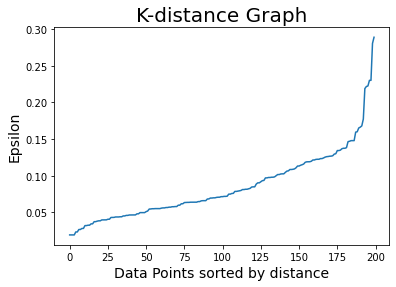

In [124]:
#Finding epsilon values
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=9)
neighbors_fit = neighbors.fit(X_new)
distances, indices = neighbors_fit.kneighbors(X_new)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()
#Nilai eps mendekati 0.15

##DBSCAN

In [125]:
db = DBSCAN(eps=0.15, min_samples=8) #MinPts didapat dari 2*Dimensional
db.fit(X_new)
labels = db.labels_
data['cluster_labels'] = labels
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cluster_labels
0,19,15,39,1,-1
1,21,15,81,1,-1
2,20,16,6,0,-1
3,23,16,77,0,0
4,31,17,40,0,-1


In [126]:
print('Cluster : ', np.unique(labels))

no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0)
for i in range(-1, no_clusters-1):
  print('Cluster ', i, ' total member ', np.sum(np.array(labels) == i))

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Cluster :  [-1  0  1  2  3  4  5  6  7]
Cluster  -1  total member  100
Cluster  0  total member  8
Cluster  1  total member  18
Cluster  2  total member  20
Cluster  3  total member  10
Cluster  4  total member  9
Cluster  5  total member  8
Cluster  6  total member  17
Cluster  7  total member  10
Estimated no. of clusters: 9
Estimated no. of noise points: 100


##Remove Outliers

In [127]:
df_clean = data[data.cluster_labels	 != -1]

In [128]:
data.shape

(200, 5)

In [129]:
df_clean.shape

(100, 5)

##Visualization

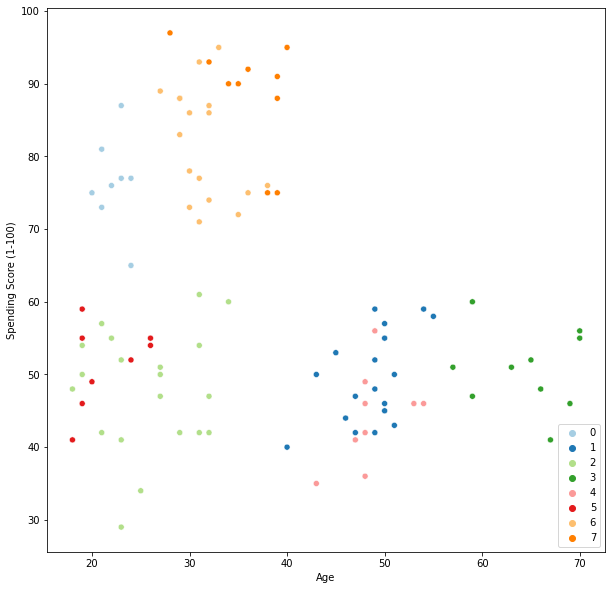

In [130]:
plt.figure(figsize=(10,10))
x_val = 'Age'
y_val = 'Spending Score (1-100)'
sns.scatterplot(x=x_val, y=y_val, hue='cluster_labels', data=df_clean, palette='Paired')

plt.legend(loc='lower right')
plt.show()

In [131]:
import plotly.express as px

x_val = 'Age'
y_val = 'Spending Score (1-100)'
z_val = 'Annual Income (k$)'

fig = px.scatter_3d(df_clean, x=x_val, y=y_val, z=z_val, color='cluster_labels', labels='cluster_labels')
fig.show()

##Visualization with Outliers

In [132]:
x_val = 'Age'
y_val = 'Spending Score (1-100)'
z_val = 'Annual Income (k$)'

fig = px.scatter_3d(data, x=x_val, y=y_val, z=z_val, color='cluster_labels', labels='cluster_labels')
fig.show()

#Agglomerative Clustering

##Visualisasi Dendogram

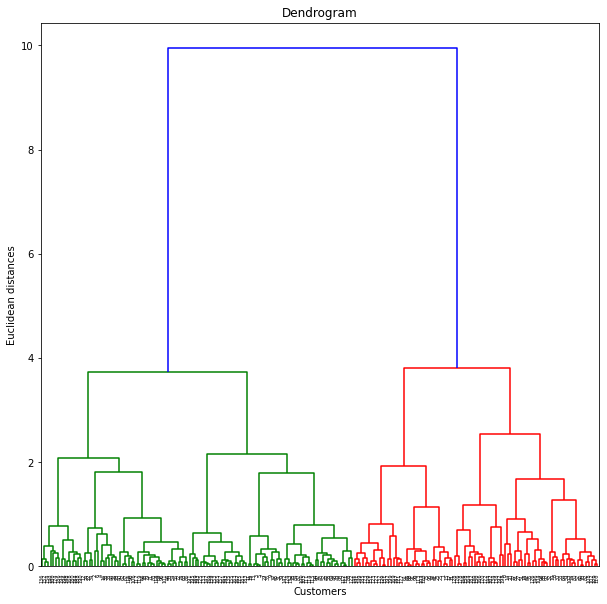

In [133]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X_new, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show() 

##Silhouete method

In [134]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

sh_list = []
for num_clusters in range(2, 22):
    ac = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = ac.fit_predict(X_new)
   
    score = silhouette_score(X_new, cluster_labels)
    sh_list.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(num_clusters, score))

For n_clusters = 2, silhouette score is 0.5194624832665107)
For n_clusters = 3, silhouette score is 0.4469979431226989)
For n_clusters = 4, silhouette score is 0.3444266582171814)
For n_clusters = 5, silhouette score is 0.35032447507156306)
For n_clusters = 6, silhouette score is 0.3460050179221861)
For n_clusters = 7, silhouette score is 0.3643550186201911)
For n_clusters = 8, silhouette score is 0.3659419625588666)
For n_clusters = 9, silhouette score is 0.38894347203023516)
For n_clusters = 10, silhouette score is 0.41403790085368813)
For n_clusters = 11, silhouette score is 0.407582730804673)
For n_clusters = 12, silhouette score is 0.42195481167348364)
For n_clusters = 13, silhouette score is 0.4230984583941615)
For n_clusters = 14, silhouette score is 0.4309774418562611)
For n_clusters = 15, silhouette score is 0.4204829750565465)
For n_clusters = 16, silhouette score is 0.42634189020512236)
For n_clusters = 17, silhouette score is 0.4235916559589207)
For n_clusters = 18, silhoue

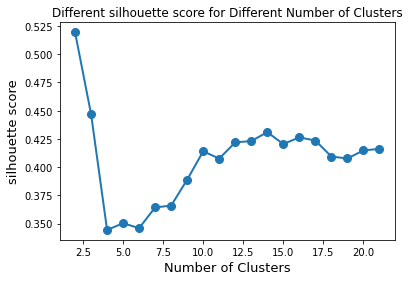

In [135]:
plt.plot(range(2,22),sh_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("silhouette score", size=13)
plt.title("Different silhouette score for Different Number of Clusters")
plt.show()

##Agglomerative Clustering

In [137]:
ac = AgglomerativeClustering(n_clusters=2) #Clustering yang memiliki nilai paling tinggi adalah 2
ac.fit(X_new)
labels = ac.labels_
df_new['cluster_labels'] = labels
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_labels
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


##Visualization

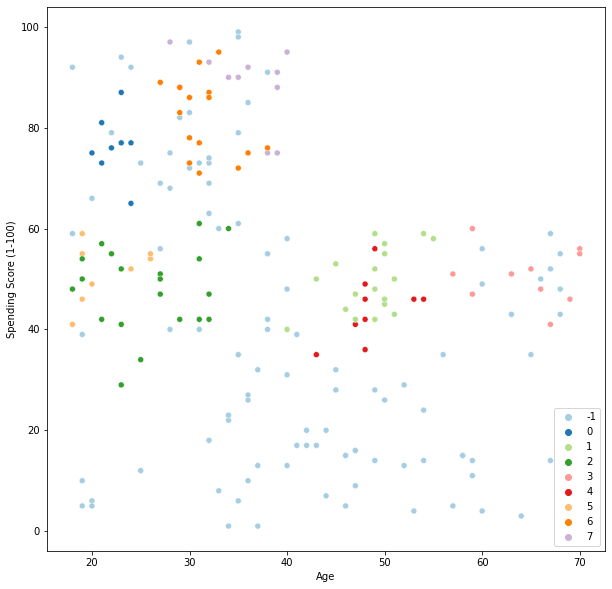

In [138]:
plt.figure(figsize=(10,10))
x_val = 'Age'
y_val = 'Spending Score (1-100)'
sns.scatterplot(x=x_val, y=y_val, hue='cluster_labels', data=data, palette='Paired')

plt.legend(loc='lower right')
plt.show()

In [139]:
import plotly.express as px

x_val = 'Age'
y_val = 'Spending Score (1-100)'
z_val = 'Annual Income (k$)'

fig = px.scatter_3d(data, x=x_val, y=y_val, z=z_val, color='cluster_labels', labels='cluster_labels')
fig.show()